In [1]:
from tensorflow.keras import models, layers
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os

In [8]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

In [9]:
print(X_train[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [10]:
model = models.Sequential()
model.add(layers.Embedding(5000, 100))
model.add(layers.Dropout(0.5))
model.add(layers.Conv1D(64, 5, padding='valid', activation='relu'))
model.add(layers.MaxPooling1D(pool_size=4))
model.add(layers.LSTM(55))
model.add(layers.Dense(1))
model.add(layers.Activation('sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 100)         500000    
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 100)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 64)          32064     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, None, 64)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 55)                26400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 56        
_________________________________________________________________
activation_1 (Activation)    (None, 1)                

In [11]:
model.compile(loss='binary_crossentropy', optimizer='adam',
             metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

In [12]:
history = model.fit(X_train, y_train, batch_size=40,
                   epochs=100, validation_split=0.25,
                   callbacks=[early_stopping])

Epoch 1/100
469/469 [==============================] - 72s 153ms/step - loss: 0.3991 - accuracy: 0.8079 - val_loss: 0.2885 - val_accuracy: 0.8802
Epoch 2/100
469/469 [==============================] - 65s 138ms/step - loss: 0.2388 - accuracy: 0.9088 - val_loss: 0.2633 - val_accuracy: 0.8933
Epoch 3/100
469/469 [==============================] - 62s 132ms/step - loss: 0.1853 - accuracy: 0.9304 - val_loss: 0.2920 - val_accuracy: 0.8866
Epoch 4/100
469/469 [==============================] - 64s 136ms/step - loss: 0.1496 - accuracy: 0.9462 - val_loss: 0.2826 - val_accuracy: 0.8878
Epoch 5/100
469/469 [==============================] - 63s 135ms/step - loss: 0.1177 - accuracy: 0.9601 - val_loss: 0.3278 - val_accuracy: 0.8782


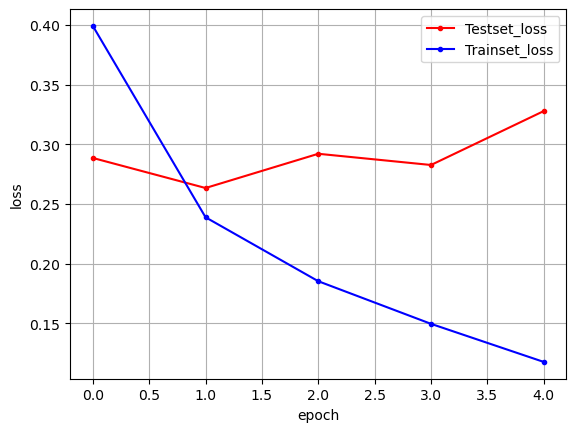

In [13]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 보겠습니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다. 
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()